In [12]:
import pandas as pd 
import sklearn
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from scipy.stats import ttest_1samp
import missingno
import statsmodels.formula.api as smf

# Description of data set

rsp500 - Monthly return on S&P 500 at an annual rate, including price cahnges and dividends

i3 - Return on three month T bill

pcip - Percentage in industrial production

# Importing the data

In [5]:
df = pd.read_stata("VOLAT(1).dta")
print(df.head())
print(df.shape)

          date  sp500  divyld    i3    ip       pcsp     rsp500      pcip  \
0  1947.010010  15.21    4.49  0.38  22.4        NaN        NaN       NaN   
1  1947.020020  15.80    4.38  0.38  22.5  46.548332  50.928333  5.357163   
2  1947.030029  15.16    4.61  0.38  22.6 -48.607620 -43.997620  5.333354   
3  1947.040039  14.60    4.75  0.38  22.5 -44.327137 -39.577137 -5.309754   
4  1947.050049  14.34    5.05  0.38  22.6 -21.369881 -16.319881  5.333354   

   ci3  ci3_1  ci3_2    pcip_1    pcip_2    pcip_3     pcsp_1     pcsp_2  \
0  NaN    NaN    NaN       NaN       NaN       NaN        NaN        NaN   
1  0.0    NaN    NaN       NaN       NaN       NaN        NaN        NaN   
2  0.0    0.0    NaN  5.357163       NaN       NaN  46.548332        NaN   
3  0.0    0.0    0.0  5.333354  5.357163       NaN -48.607620  46.548332   
4  0.0    0.0    0.0 -5.309754  5.333354  5.357163 -44.327137 -48.607620   

      pcsp_3      month  
0        NaN 1947-01-01  
1        NaN 1947-02-01  
2 

In [6]:
df.describe()

,date,sp500,divyld,i3,ip,pcsp,rsp500,pcip,ci3,ci3_1,ci3_2,pcip_1,pcip_2,pcip_3,pcsp_1,pcsp_2,pcsp_3
count,558.000000,558.000000,558.000000,558.000000,558.000000,557.000000,557.000000,557.000000,557.000000,556.000000,555.000000,556.000000,555.000000,554.000000,556.000000,555.000000,554.000000
mean,1969.816528,118.273407,4.154139,5.004945,62.609501,7.990778,12.144324,3.507907,0.004883,0.004640,0.004523,3.518129,3.526427,3.526890,7.991529,7.995339,8.043839
std,13.436476,103.437805,1.102117,3.171102,27.408918,40.326008,40.297913,13.237979,0.491545,0.491954,0.492390,13.247705,13.258218,13.270181,40.362339,40.398628,40.418968
min,1947.010010,13.970000,2.690000,0.380000,21.600000,-150.556854,-146.896851,-50.632912,-4.850000,-4.850000,-4.850000,-50.632912,-50.632912,-50.632912,-150.556854,-150.556854,-150.556854
25%,1958.082458,48.824999,3.190000,2.610000,36.000000,-15.125109,-11.057409,-3.719046,-0.120000,-0.120000,-0.120000,-3.734170,-3.749294,-3.764418,-15.186691,-15.248274,-15.102324
50%,1970.035034,92.275002,3.815000,4.610000,62.000000,10.090999,14.596664,4.040342,0.010000,0.010000,0.010000,4.047206,4.054070,4.060941,10.323974,10.556949,10.656656
75%,1981.107483,127.927496,4.970000,7.040000,85.475000,34.403458,38.699768,9.870806,0.160000,0.162500,0.165000,9.888301,9.905796,9.923290,34.407806,34.412151,34.416496
max,1993.060059,450.160004,7.240000,16.299999,110.400002,139.863190,145.493195,78.832169,2.719999,2.719999,2.719999,78.832169,78.832169,78.832169,139.863190,139.863190,139.863190


# Checking for null values

In [7]:
df.isna().any()

date      False
sp500     False
divyld    False
i3        False
ip        False
pcsp       True
rsp500     True
pcip       True
ci3        True
ci3_1      True
ci3_2      True
pcip_1     True
pcip_2     True
pcip_3     True
pcsp_1     True
pcsp_2     True
pcsp_3     True
month     False
dtype: bool

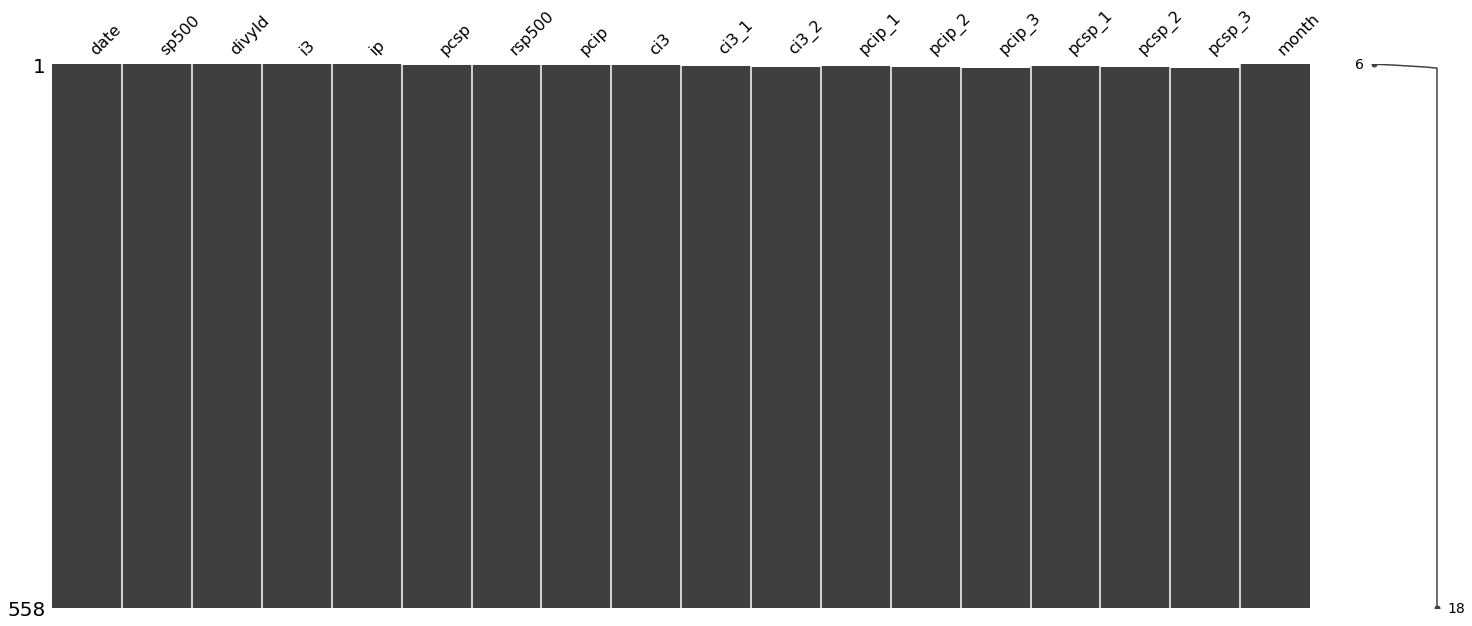

In [10]:
missingno.matrix(df)

# Q1a

Consider the equation rsp500_t = \beta_0 + \beta_1 * pcip_t + \beta_2 * i3_t + u_t

What signs do you think \beta_1 and \beta_2 should have?

\beta_1 should have a positive sign. The more investment is put into industrial production, the greater the return from the S&P 500.

\beta_2 should have a negative sign. Bonds and stocks are opposites in terms of how investors consume them. Bonds are safer than stocks but offer a lower return. When stocks prices go up, bond prices go down.

In [14]:
X = df[["pcip", "i3"]]
X = sm.add_constant(X)
y = df["rsp500"]

model = sm.OLS(y, X, missing = "drop")
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 rsp500   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     3.334
Date:                Thu, 04 Feb 2021   Prob (F-statistic):             0.0364
Time:                        09:19:24   Log-Likelihood:                -2845.4
No. Observations:                 557   AIC:                             5697.
Df Residuals:                     554   BIC:                             5710.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.8431      3.275      5.754      0.0

# Q1b: Interpreting signs and magnitudes

This is a level-level model for both variables.

pcip - A one percentage point increase in pcip leads to a $0.037 increase in monthly return from the S&P500 on average, ceteris paribus.

i3 - A one dollar increase in i3 leads to a $1.36 decrease in monthly return from the S&P500 on average, ceteris paribus.



# Q1c: Which of the variables is statistically significant?

i3 and const are statistically significant because they have p value of less than 0.05.

In [16]:
# Formula for t-statistic
t_statistic = (-1.3617-(-1))/(0.541)

print(t_statistic)

if abs(t_statistic) >= 1.96:
    print("Reject H_0 = -1 at alpha = 0.05")
else:
    print("Fail to reject H_0 = -1 at alpha = 0.05")

-0.6685767097966726
Fail to reject H_0 = -1 at alpha = 0.05


# Q1d: Does your finding from part b) imply that the return on the S&P500 is predictable? Explain.

No. Just knowing the regression output is not good enough to determine if the return is predictable. The x variables are dated contemporaneously with rsp500. The regression only says that there is a change in i3 that is associated with a contemporaneous change in rsp500. A time lag needs to be introduced to account for this and to make predictions.

# Are your conclusions for (b) to (d) reliable? Explain?

No. Before running the regression on time series data, we need to check for stationarity. Otherwise, the output can be invalid if the time series data happens to not be stationary.

## Corrections: 

- Check for homoskedasticity and lack of serial correlation
    - These are necessary conditions for a valid standard error

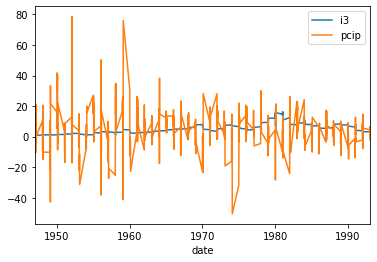

In [25]:
# Checking for stationarity
# df.set_index("date").plot()

df.plot(x = "date", y = ["i3", "pcip"])

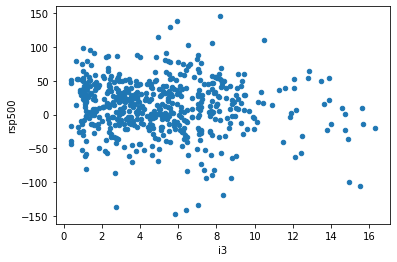

In [28]:
# Checking for homoskedasticity

df.plot(y = "rsp500", x = "i3", kind = "scatter")

# Q2a: Suppose the time series model below satisfies the Gauss-Markov assumptions. Explain the coefficients \beta_1, \beta_2, \beta_3

GDP_t = \beta_0 + \beta_1 * time + \beta_2 * interest_rate_t + \beta_3 * interest_rate_(t-1) + u_t

\beta_1 represents the per unit change in GDP at a given time period on average, ceteris paribus

\beta_2 represents the per unit change in GDP given a per unit change in interest rate in the same period on average, ceteris paribus

\beta_3 represents the per unit change in GDP given a per unit change in interest rate in the previous period on average, ceteris paribus

# Q2b: Provide one time series example such that the y series' Cov(y_t, y_(t-1)) > 0

During periods of economic growth, Cov(y_t, y_(t-1)) > 0

# Q2b: Provide one time series example such that the y series' Cov(y_t, y_(t-1)) < 0

Year to year fluctuations under uncertain economic conditions Cov(y_t, y_(t-1)) < 0

## Corrections:

Temperature observed every 12 hours

# Q2d: Consider the time series regression model as follows:

ln(GDP_t) = \beta_0 + \beta_1 * unemployment_rate_t + \beta_2 * investment_t + u_t

Do you think the strict exogeneity assumption holds? Why?

The strict exogeneity assumption does not hold. It is easy to find a variable within the u_t term that correlates with either unemployment rate or investment across both current, past and future periods.


For example, the presence of a recession would correlate with both unemployment rate and investment across multiple periods.

# Q2e: Comment on the following statement, "Like cross-sectional observations, we can assume that most time series observations are inpdendently distributed"

This is false. Due to aspects of time series data like temporal ordering and serial correlation, time series observations are dependent on observations from previous periods. This is unlike cross-sectional observations, which are randomly sampled and hence are assumed to be independent observations.

# Q3: Consider the following time series regression model

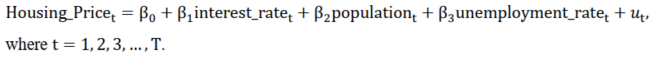

# Q3a: Write down the strict exogeneity assumption using the matrix form similar to page 10 on Lecture Note 2. Explain every element in your matrix form in detail.

E(u_t|interest_rate, population, unemployment_rate), = 0, t = 1,...,T

The error term conditional on interest rate, population size and unemployment rate is uncorrelated in past, present and future periods. 

There is no t subscript because strict exogeneity requires that each error term is mean-independent from all regressors past present and future.

# Q3b: Write down the contemporaneous exogeneity assumption

E(u_t|interest_rate_t, population_t, unemployment_rate_t) = 0, t = 1,...,T
